<a href="https://colab.research.google.com/github/JuanMMaldonado/Coder-Data-Science/blob/main/Desafio6_ProyectoDS_ParteII_MaldonadoMamaniCardenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstracto

In [ ]:
# Abstracto con Motivacion y Audiencia

El dataset seleccionado consiste en el inventario actual de una compañía multinacional dedicada a la venta de calzado, indumentaria y accesorios. A su vez, el inventario consiste en producto físico en el deposito (stock on-hand), producto en tránsito (en transporte desde fabrica al deposito) y producto en la línea de producción (en fabrica de origen). El objetivo del trabajo es identificar variables claves, analizar la información mediante métodos de data science y lograr un modelo de predicción de uso comercial que sirva para optimizar tiempos/costos de la compañía.  La audiencia de este trabajo serian la linea gerencial y/o directores con poder de toma de decisión sobre compras futuras.

# Preguntas/Hipótesis

In [ ]:
# Preguntas e Hipotesis que queremos resolver mediante el analisis exploratorio de datos:
#1 En base al historico de inventario, determinar las categorias de los articulos a invertir a futuro
#2 En base al historico de inventario, determinar el mix de compra para cada tipo de género

In [1]:
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:

# Reading the content and turning it into a pandas dataframe
url = 'https://raw.githubusercontent.com/JuanMMaldonado/Coder-Data-Science/main/Data%20Set%20II%20Ok%20format-%20MRP%20Inventory.csv'
df = pd.read_csv(url)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129726 entries, 0 to 129725
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_articulo      129726 non-null  object 
 1   nombre_articulo  129726 non-null  object 
 2   temporada        129726 non-null  object 
 3   division         129726 non-null  object 
 4   edad             129726 non-null  object 
 5   genero           129726 non-null  object 
 6   tipo_producto    129726 non-null  object 
 7   categoria        129726 non-null  object 
 8   precio           129726 non-null  float64
 9   qty_inventario   129726 non-null  int64  
 10  nombre_canal     129726 non-null  object 
 11  nombre_inv       129726 non-null  object 
 12  fecha_pedido     129726 non-null  object 
 13  id_cliente       129726 non-null  object 
 14  nombre_cliente   99016 non-null   object 
 15  id_compra        129726 non-null  int64  
 16  id_fabrica       102743 non-null  obje

In [4]:
df_num = df.select_dtypes('number') # datos númericos
df_num['genero'] = df['genero']
df_num.head()

,precio,qty_inventario,id_compra,genero
0,43199.1,3,295767087,Man
1,43199.1,77,295767087,Man
2,31499.1,3,295767596,Man
3,31499.1,43,295767596,Man
4,10799.1,102,295310823,Man


In [6]:
df.columns

Index(['id_articulo', 'nombre_articulo', 'temporada', 'division', 'edad',
       'genero', 'tipo_producto', 'categoria', 'precio', 'qty_inventario',
       'nombre_canal', 'nombre_inv', 'fecha_pedido', 'id_cliente',
       'nombre_cliente', 'id_compra', 'id_fabrica', 'nombre_fabrica',
       'ciudad_fabrica', 'pais_fabrica', 'fecha_entrega'],
      dtype='object')

In [7]:
## nos quedamos con las columnas sin procesar outliers:
columnas1 = df_num.columns.tolist()[:-1]
columnas1

['precio', 'qty_inventario', 'id_compra']

In [8]:
d_desc = {'id_articulo':'codigo de articulo', 'nombre_articulo':'descripcion del articulo', 'temporada':'temporada caldenario de venta', 'division':'calzado/indumentaria/accesorios', 'edad':'edad de consumidor apuntado',
       'genero':'genero de consumidor apuntado', 'tipo_producto':'breve descr del producto', 'categoria':'segmento del producto', 'precio':'precio de venta', 'qty_inventario':'cantidad en inventario',
       'nombre_canal':'canal de venta', 'nombre_inv':'estado de inventario', 'fecha_pedido':'fecha de preventa', 'id_cliente':'codigo de cliente',
       'nombre_cliente':'nombre de cliente', 'id_compra':'codigo de orden de compra', 'id_fabrica':'codigo de fabrica', 'nombre_fabrica':'nombre de la fabrica',
       'ciudad_fabrica':'ciudad origen de la fabrica', 'pais_fabrica':'pais origen de la fabrica', 'fecha_entrega':'fecha de entrega pactada'}

In [9]:
df_num.drop_duplicates(inplace=True) #df_num = df_num.drop_duplicates()

In [10]:
df_num.genero.unique()

array(['Man', 'Woman', 'Unisex'], dtype=object)

In [16]:
## Convertimos la variable target a valores enteros
df_num['genero'] = df_num.genero.map({'Man':0, 'Woman':1, 'Unisex':3})

In [11]:
# split del dataset
from sklearn.model_selection import train_test_split

In [12]:
# separamos las caracteristicas/features del target
X = df_num[columnas1] #.drop('y', axis=1)
y = df_num['genero']

In [13]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (68288, 3)
Tamaño del set de testeo: (17072, 3)


genero genero de consumidor apuntado


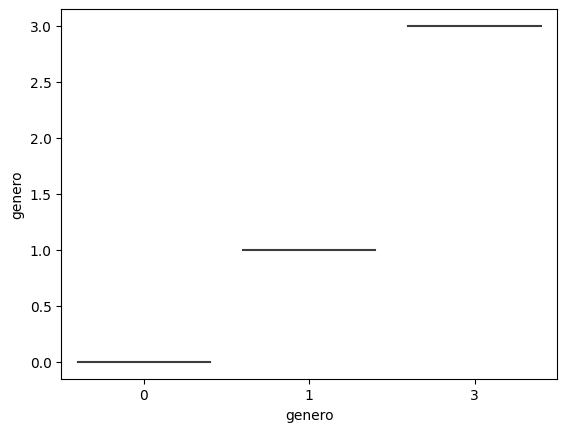

precio precio de venta


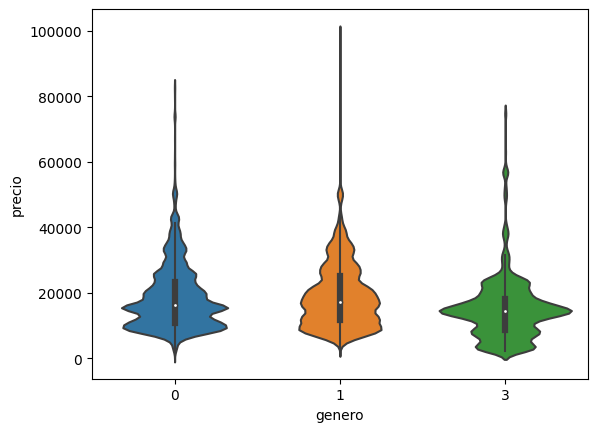

qty_inventario cantidad en inventario


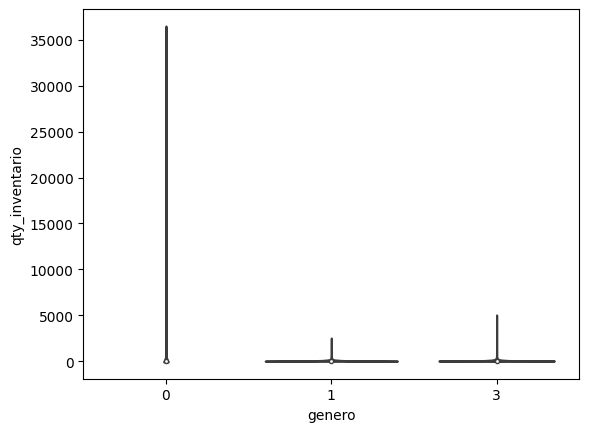

In [17]:
#aplicar arbol de decision?

for col in ['genero', 'precio', 'qty_inventario']:
    print(col, d_desc[col])
    sns.violinplot(x='genero', y=col, data=df_num)
    plt.show()

# EDA

In [ ]:
# Analisis Exploratorio de Datos

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '22F'),
  Text(1, 0, '20S'),
  Text(2, 0, '22S'),
  Text(3, 0, '21F'),
  Text(4, 0, '20F'),
  Text(5, 0, '19F'),
  Text(6, 0, '19S'),
  Text(7, 0, '18F'),
  Text(8, 0, '21S'),
  Text(9, 0, '23S')])

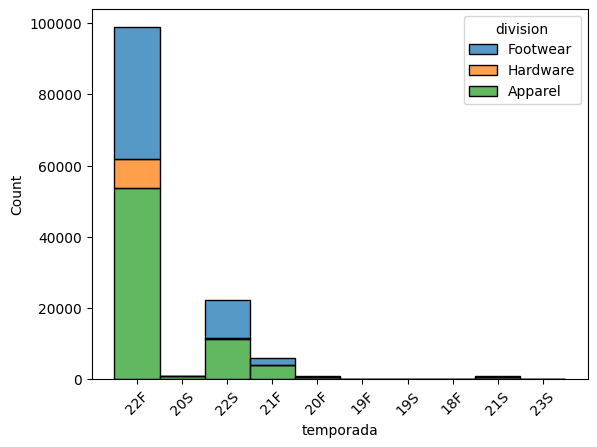

In [18]:
#Histograma por categorias
h = sns.histplot(data=df, x="temporada", hue="division", multiple="stack")

plt.xticks(rotation = 45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '22F'),
  Text(1, 0, '20S'),
  Text(2, 0, '22S'),
  Text(3, 0, '21F'),
  Text(4, 0, '20F'),
  Text(5, 0, '19F'),
  Text(6, 0, '19S'),
  Text(7, 0, '18F'),
  Text(8, 0, '21S'),
  Text(9, 0, '23S')])

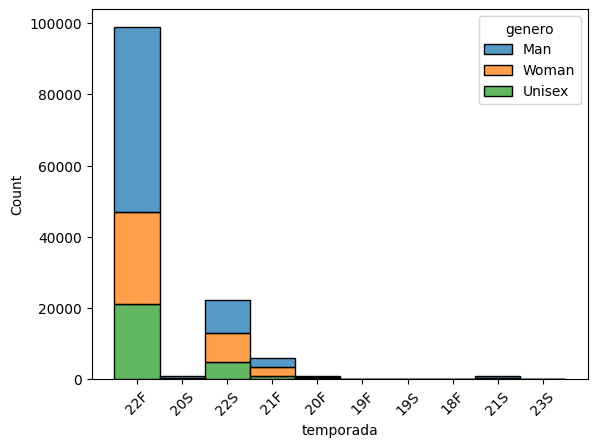

In [19]:
#Histograma por genero
h = sns.histplot(data=df, x="temporada", hue="genero", multiple="stack")

plt.xticks(rotation = 45)

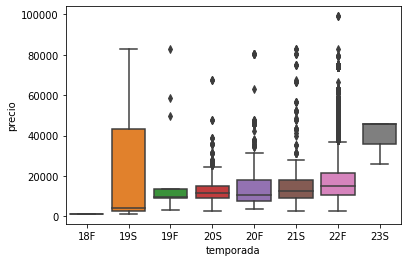

In [ ]:
#Boxplot de precios por temporada
ax = sns.boxplot(x="temporada", y="precio", data=df, order=["18F","19S","19F","20S","20F","21S","22F","23S"])

# Recomendaciones

#1 En base al historico de inventario, determinar las categorias de los articulos a invertir a futuro

El porcentaje mayoritario corresponde a la categoria indumentaria

#2 En base al historico de inventario, determinar el mix de compra para cada tipo de género

El porcentaje mayoritario corresponde al género hombre
